In [ ]:
## load csv file from cloud drive
from google.colab import drive
drive.mount('/content/drive/')
data_path = "/content/drive/MyDrive/Colab Notebooks/"  # this is your drive

Mounted at /content/drive/


In [ ]:
import pandas as pd
df = pd.read_csv(data_path +"data_nostandard_v2 (1).csv")
df.head()

,Year,Time of Tweet,text,Platform,quarter,Day Part,p_text,word_count,word_adj,word_n,word_v,sentiment
0,2018,0,What a great day!!! Looks like dream.,0,2,1,great day look like dream,7,1,2,1,0
1,2018,1,"I feel sorry, I miss you here in the sea beach",1,2,1,feel sorri miss sea beach,11,1,2,2,0
2,2017,2,Don't angry me,1,2,1,dont angri,3,0,0,2,2
3,2022,0,We attend in the class just for listening teac...,1,1,0,attend class listen teacher read slide nonsenc,14,0,5,3,2
4,2022,1,"Those who want to go, let them go",2,1,0,want go let go,8,0,0,4,2


In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
!pip install keras

In [ ]:
!pip install tensorflow

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


#Since the preprocessing have already removed the stopwords,we dont really need to do it now.

max_words = 1500
max_length = 200

x = df['p_text']
y = df['sentiment']

# make sure no Na value in the processed column
x = x.fillna('')


# initialize tokenizer
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x)

# turning text into sequences
sequences = tokenizer.texts_to_sequences(x)

# padding to make sequences into same length
x = pad_sequences(sequences, maxlen=max_length)
print(x)

[[   0    0    0 ...   46    6  299]
 [   0    0    0 ...   11  201  202]
 [   0    0    0 ...    0    7  300]
 ...
 [   0    0    0 ... 1191  298  530]
 [   0    0    0 ... 1193  157  544]
 [   0    0    0 ...   13 1194   11]]


In [ ]:
#model parameters
vocab_size = 15000
embedding_dim = 100
oov_tok = "<OOV>"
training_portion = 0.2
BATCH_SIZE = 80

train_size = int(len(x) * training_portion)
train_x = x[:train_size]
train_y = y[:train_size]
val_x = x[train_size:]
val_y = y[train_size:]

In [ ]:
!unzip /content/drive/MyDrive/glove.6B.zip -d /content/drive/MyDrive/glove

Archive:  /content/drive/MyDrive/glove.6B.zip
  inflating: /content/drive/MyDrive/glove/glove.6B.50d.txt  
  inflating: /content/drive/MyDrive/glove/glove.6B.100d.txt  
  inflating: /content/drive/MyDrive/glove/glove.6B.200d.txt  
  inflating: /content/drive/MyDrive/glove/glove.6B.300d.txt  


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

# create CNN model
model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),  # Embedding layer
    Conv1D(128, 5, activation='relu', kernel_regularizer=l2(0.01)),   # First convultional layer
    Conv1D(64, 3, activation='relu', kernel_regularizer=l2(0.01)),    # second
    Conv1D(32, 3, activation='relu', kernel_regularizer=l2(0.01)),    # third
    GlobalMaxPooling1D(),                                           # global max pooling
    Dense(24, activation='relu', kernel_regularizer=l2(0.01)),       # full connected layer
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(train_x, train_y, epochs=30, batch_size=BATCH_SIZE, validation_data=(val_x, val_y), verbose=1)


loss, accuracy = model.evaluate(val_x, val_y, verbose=1)
print(f'Validation accuracy: {accuracy:.4f}')

Epoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 819ms/step - accuracy: 0.3389 - loss: 3.3457 - val_accuracy: 0.4075 - val_loss: 3.1856
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 415ms/step - accuracy: 0.3649 - loss: 3.1679 - val_accuracy: 0.4075 - val_loss: 3.0156
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 415ms/step - accuracy: 0.3825 - loss: 2.9955 - val_accuracy: 0.4075 - val_loss: 2.8392
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 458ms/step - accuracy: 0.3482 - loss: 2.8190 - val_accuracy: 0.4075 - val_loss: 2.6519
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 450ms/step - accuracy: 0.3482 - loss: 2.6461 - val_accuracy: 0.4075 - val_loss: 2.4592
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 441ms/step - accuracy: 0.3783 - loss: 2.4007 - val_accuracy: 0.4075 - val_loss: 2.2723
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 824ms/step - accuracy: 0.3674 - loss: 2.2578 - val_accuracy: 0.4075 - val_loss: 2.1079
Epoch 8/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 734ms/step - accuracy: 0.3565 - loss: 2.1425 - val_accuracy: 0.4075 - val_loss:

In [ ]:
#separate the data set
idx = list(range(len(x)))
train_idx, val_idx = train_test_split(idx, test_size=0.2, random_state=42)

train_x = x[train_idx]
val_x = x[val_idx]
train_y = df['sentiment'].iloc[train_idx].values
val_y = df['sentiment'].iloc[val_idx].values

# prepare the text feature: word_n, Year and word_count
train_word_n = df['word_n'].iloc[train_idx].values.reshape(-1, 1)
train_year = df['Year'].iloc[train_idx].values.reshape(-1, 1)
train_word_count = df['word_count'].iloc[train_idx].values.reshape(-1, 1)

val_word_n = df['word_n'].iloc[val_idx].values.reshape(-1, 1)
val_year = df['Year'].iloc[val_idx].values.reshape(-1, 1)
val_word_count = df['word_count'].iloc[val_idx].values.reshape(-1, 1)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, concatenate


x_text = Input(shape=(max_length,), name='text_input')
x_word_n = Input(shape=(1,), name='word_n_input')
x_year = Input(shape=(1,), name='year_input')
x_word_count = Input(shape=(1,), name='word_count_input')

# text feature processiing
embedding = Embedding(vocab_size, embedding_dim)(x_text)
conv = Conv1D(128, 5, activation='relu')(embedding)
pool = GlobalMaxPooling1D()(conv)

# data feature processing
dense_word_n = Dense(16, activation='relu')(x_word_n)
dense_year = Dense(16, activation='relu')(x_year)
dense_word_count = Dense(16, activation='relu')(x_word_count)

# feature concat
concat = concatenate([pool, dense_word_n, dense_year, dense_word_count])
dense = Dense(24, activation='relu')(concat)
dropout = Dropout(0.5)(dense)
output = Dense(1, activation='sigmoid')(dropout)

# model building
model = Model(inputs=[x_text, x_word_n, x_year, x_word_count], outputs=output)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# model training
history = model.fit([train_x, train_word_n, train_year, train_word_count], train_y,
                    epochs=30, batch_size=BATCH_SIZE,
                    validation_data=([val_x, val_word_n, val_year, val_word_count], val_y), verbose=1)

# Evaluation
loss, accuracy = model.evaluate([val_x, val_word_n, val_year, val_word_count], val_y, verbose=1)
print(f'Validation accuracy: {accuracy:.4f}')

Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 317ms/step - accuracy: 0.4354 - loss: 14.7767 - val_accuracy: 0.3000 - val_loss: -2.3473
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 238ms/step - accuracy: 0.4353 - loss: 20.4980 - val_accuracy: 0.3000 - val_loss: -2.9220
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 227ms/step - accuracy: 0.3927 - loss: 10.9100 - val_accuracy: 0.3000 - val_loss: -3.2723
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 242ms/step - accuracy: 0.4528 - loss: 8.0853 - val_accuracy: 0.3000 - val_loss: -3.4154
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 429ms/step - accuracy: 0.4218 - loss: 15.1369 - val_accuracy: 0.3000 - val_loss: -3.3310
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 375ms/step - accuracy: 0.4106 - loss: 15.7805 - val_accuracy: 0.3000 - val_loss: -3.1407
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 250ms/step - accuracy: 0.4207 - loss: 10.2676 - val_accuracy: 0.3000 - val_loss: -2.9326
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 232ms/step - accuracy: 0.4136 - loss: 15.1430 - val_accuracy: 0.30

KeyboardInterrupt: 

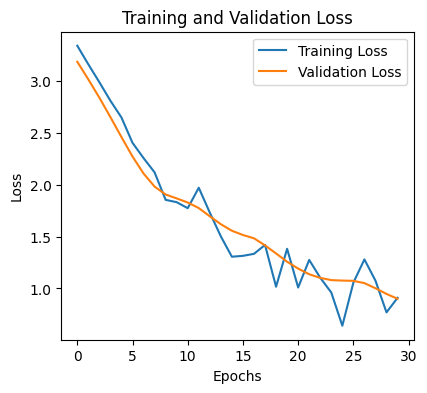

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

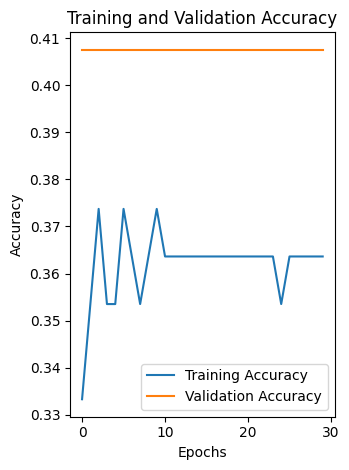

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()